# Introduction to trees

## MTH 325: Discrete Structures for Computer Science 2

## Overview

With this lesson, we begin our final unit of the course with a short study of **trees**. We have already learned about the basics of trees: They are connected graphs that have no cycles. But there's much more to learn! Trees are incredibly useful tools in computer science with a myriad of applications, and they are well worth understanding both from an applied and theoretical standpoint. In this lesson, we will revisit the basic notion of a tree and some new terminology to describe parts of a tree; and then our lesson will be spent answering some basic questions about properties of trees.

**Learning Targets addressed:**

+ **T.1:** I can give examples of trees with combinations of important properties and determine information about a tree as a whole or about parts of the tree. 



## Background

### Terminology 

First of all, what is a tree? We learned the following definition earlier in the course: 

> **Definition:** A **tree** is a graph that is connected and has no cycles. 

Please note that "graph" means "_undirected_ graph". We're not working with relations any more, so directed graphs are on the sidelines for now. 

Here is an example of a tree. To generate more, download this notebook and just keep executing this cell over and over again while changing the value plugged into the networkX function: 

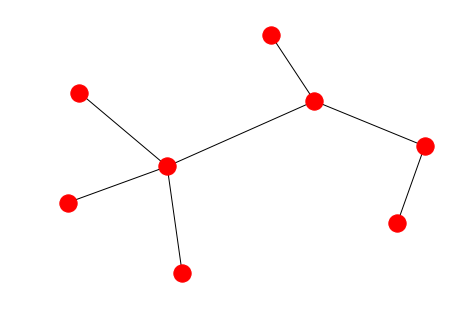

In [1]:
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import matplotlib.pyplot as plt

t = nx.random_powerlaw_tree(8)

nx.draw(t)
plt.show()

Both parts of the definition --- connected _and_ having no cycles --- are necessary. A graph that merely has no cycles, but which may not be connected, is called a **forest** because it is a collection of trees. 

We often structure trees in a particular way by designating one of the nodes as "special", and ordering the rest of the nodes in relation to it: 

>**Definition:** A **rooted tree** is a tree in which one vertex has been designated as the **root** and every edge is directed away from the root. 

Note: A rooted tree is still considered an undirected graph since the choice of root determines the direction of the edges.

Here's an example of a rooted tree with node 4 as the root. We often draw rooted trees with the node at the top (the opposite of a real-life tree) and all the other nodes "flow downward" from the root. 

<img src="rooted-tree.png">

A rooted tree is like a family tree in geneaology. And just like a family tree has all sorts of terms for people and how they relate to each other (cousins, second cousin twice removed, etc.), we have terms to describe the nodes in a rooted tree and how they relate to each other:

>**Definition:** Let $T$ be a rooted tree.  
>+ Suppose $v$ is a vertex other than the root. The **parent** of $v$ is the vertex $u$ such that there is an edge from $u$ to $v$. 
>+ If $u$ is the parent of a vertex $v$ then $v$ is called a **child** of $u$. 
>+ Vertices with the same parents are called **siblings**. 
>+ The **ancestors** of a vertex other than the root are the vertices in the path from the root to that vertex. 
>+ The **descendants** of a vertex $v$ are those vertices that have $v$ as an ancestor. 
>+ A vertex of a rooted tree is called a **leaf** if it has no children. 
>+ A vertex of a rooted tree is called an **internal vertex** if it is not a leaf (that is, if it has at least one child). Note that this implies that the root of a tree is an internal vertex unless it is the only node in the tree. 
>+ If $a$ is a vertex in a rooted tree, then the **subtree** with $a$ as its root is the subgraph of the tree consisting of $a$ and descendants and all edges incident to these descendants. 
>+ The **level** of a vertex $v$ in a rooted tree is the length of the path from the root to that vertex. The **height** of a rooted tree is the maximum of the levels of its vertices. 

For example in the rooted tree above with node 4 as the root: 

+ Node 13 is the parent of nodes 5, 18, and 1. 
+ Node 12 is a child of node 16.
+ Nodes 13, 7, and 16 are siblings. 
+ The ancestors of node 5 are nodes 13 and 4. 
+ The descendants of node 5 are nodes 11, 15, 14, 2, 10, and 9. 
+ Nodes 18, 10, and 0 are leaves. (There are others.) 
+ Nodes 11, 17, and 8 are internal vertices. (There are others.) 
+ The subtree with 17 as its root consists of nodes 17, 6, and 0. 
+ Node 11 is at level 3 in the tree; node 12 is at level 2. 
+ The height of this tree is 5. 

Finally, we have some ways of describing the ways the "branches" of a rooted tree propagate as we move away from the root: 

>**Definition:** A rooted tree is called **binary** if every internal vertex has no more than two children. A rooted tree is called a **full binary tree** if every internal vertex has _exactly_ two children.

The rooted tree above is _not_ binary because some of the internal vertices (4, 13, 11) have more than two children. Another way of putting it is that in a binary tree, there are no more than two "branches" at any internal node; in a *full* binary tree, every internal branches into exacty two children. 

More generally we have this: 

>**Definition:** A rooted tree is called an $m$-**ary tree** (pronounced EM-airy) if every internal vertex has no more than $m$ children. A rooted tree is called a **full $m$-ary tree** if every internal vertex has _exactly_ $m$ children.

So the rooted tree above is not binary, but it is "$3$-ary" because every internal vertex has fewer than 3 children. It is not a full 3-ary tree because *not every* internal vertex has 3 children. 

One last definition will give us a way of distinguishing trees with a "good layout" from those that don't: 

>**Definition:** A rooted $m$-ary tree of height $h$ is said to be **balanced** if all its leaves are at levels $h$ or $h-1$, and it is said to be **complete** if every leaf is at the same level. 


The rooted tree above is not balanced; it has height 5 but not every leaf is at level 4 or 5. (Nodes 18 and 1 are at level 2; nodes 6 and 0 are at level 3.) Hence it is not complete either. (Every complete $m$-ary tree is balanced; but not vice versa.) 

Here is an example of a full and complete binary tree: 

<img src="ExampleBST.jpg">

It's _complete_ because all the leaves are at the same level. It's _full_ and _binary_ because every internal vertex splits off into exactly two children (no more, no less). 


### Questions

Our class work for this lesson is going to consist of looking at several questions about trees and seeing if we can answer them in a mathematical way --- rigorously and abstractly, so the answers can be used with confidence in the greatest number of places. Here are the questions we'll consider: 


>**Question 1:** In a (nonempty) tree, how many paths are there between two different nodes? 

>**Question 2:** If $T$ is a tree, what does removal of an existing edge do to the tree?

>**Question 3:** If $T$ is a tree, what does addition of a new edge between two existing nodes do to the tree?

>**Question 4:** Are trees always planar? 

>**Question 5:** What is the chromatic number of a tree?

>**Question 6:** Can a tree ever have an Euler path? What about a Hamilton path? (And, why is it pointless to ask whether a tree can have an Euler or Hamiltonian cycle?) 

>**Question 7:** If $T$ is a full binary tree with $k$ internal vertices, how many vertices in all does it have? And how many leaves does it have? 

>**Question 8:** If $T$ is a full $m$-ary tree with $k$ internal vertices, how many vertices in all does it have? And how many leaves does it have? 

>**Question 9:** What is the maximum number of leaves in a binary tree of height $h$? What about an $m$-ary tree of height $h$? 

>**Question 10:** If a binary tree of height $h$ has $k$ leaves, then what is the smallest value that $h$ can be? And under what conditions will $h$ attain this value? 